# Clustering Analysis

As we approach to the last step of exploring this basketball player dataset, I am going to use unsupervised learning methods to cluster the players into categories that can better summarizes the unique characters of its members. 

Lets first start by loading the python libraries.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import cluster as skc
import sklearn as skl
import sklearn.preprocessing
%matplotlib inline
import csv

### Create numerical version of the dataset
I will continue to use the cleansed version of player season data, and I will create an all numerical version of it by removing string columns for following reasons.

1. String columns include player names, player team, player positions, among these player name does not effect the performance of player. Player team can affect player performance due to the game style for each team, but consider the fact that the game style is very much determined by the coach, which is highly inconsistent throughout the time, therefore the player team column will also not be considered. The other non-numerical attribute is player position, which is the traditional way of categorizing player characteristics, but since our purpose is to redefine a way to categorize players, so we do not have to include this column.
2. For computational purpose, only numerical data can be the function input.

In [36]:
with open('data/Seasons_Stats_cleansed.csv') as csvfile:
    reader1 = csv.reader(csvfile)
data = pd.read_csv('data/Seasons_Stats_cleansed.csv',sep='\t')

str_list = [] # empty list to contain columns with strings
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
        str_list.append(colname)
#Get to the numeric columns by inversion
data_num_list = data.columns.difference(str_list)
data_num = data[data_num_list]

Both the original dataset and all numerical dataset will be divided into four subsets according to time period.

#### -  Subdivide original dataset

In [37]:
pre90s_all = data[~(data['Year']>1989)]
_90s_all = data[~(data['Year']<1990) & ~(data['Year']>1999)]
_00s_all = data[~(data['Year']<2000) & ~(data['Year']>2009)]
_10s_all = data[~(data['Year']<2010)]

#### - Subdivide numerical dataset

In [38]:
pre90s = data_num[~(data_num['Year']>1989)]
_90s = data_num[~(data_num['Year']<1990) & ~(data_num['Year']>1999)]
_00s = data_num[~(data_num['Year']<2000) & ~(data_num['Year']>2009)]
_10s = data_num[~(data_num['Year']<2010)]

Since we want to observe the changing behavior of basketball throughout time, I will choose the two subsets have the largest time gap in between, which is pre90(players data before 1990) and _10s(players since 2010).

### Normalize numerical dataset

The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values. Since the column features of our dataset have different ranges, such as the range of scoring points is from 0 to 30+, and for height and weight is even larger, but for other features like number of blocks or steal, the range tends to be much smaller. So in order to prevent the bias of the predicative model towards feature with higher number, we have to normalize the dataset. 

In [51]:
from sklearn.preprocessing import StandardScaler
pre90s_z = StandardScaler().fit_transform(pre90s)
_90s_z = StandardScaler().fit_transform(_90s)
_00s_z = StandardScaler().fit_transform(_00s)
_10s_z = StandardScaler().fit_transform(_10s)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 we

### Feature analysis with PCA

In order to do so, we will first perform PCA implementation that comes with Python's sklearn machine learning library.

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(pre90s_z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

This gives us an object we can use to transform our data by calling transform.

In [42]:
pre90s_existing_nd = pca.transform(pre90s_z)

In [43]:
pre90s_existing_df_nd = pd.DataFrame(pre90s_existing_nd)
pre90s_existing_df_nd.index = pre90s.index
pre90s_existing_df_nd.columns = pre90s.columns
pre90s_existing_df_nd.head()

,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,Age,...,USG%,Unnamed: 0,Unnamed: 0.1,VORP,WS,WS/48,Year,eFG%,height,weight
0,7.273874,6.948453,0.978524,-2.550207,0.397649,2.387483,3.597629,-0.804004,-0.909963,3.203046,...,0.002887,0.008685,0.003512,-0.012024,-0.003770,-0.001885,4.222398e-15,-5.607932e-16,5.324511e-17,8.364084e-17
1,1.447831,0.728610,-0.818380,-1.885756,-2.900264,-0.577932,2.341132,-0.494287,-2.191353,-1.410629,...,0.063249,-0.006095,0.016221,-0.014810,0.000226,-0.000715,8.114234e-16,-5.506017e-16,3.549201e-17,-1.594903e-16
2,3.200364,1.918387,2.404085,-3.459741,1.652416,1.641403,1.598146,0.638267,1.179028,0.393193,...,-0.006467,0.002337,0.016501,0.003476,0.001653,0.001725,8.241319e-16,-6.858261e-17,-1.365589e-16,-5.388803e-16
3,-3.464682,0.190444,1.216523,-3.772577,-0.952089,0.264052,-1.000155,1.092352,0.342181,1.039429,...,0.004904,-0.016284,-0.013015,0.007183,0.001927,0.002139,-3.116916e-16,3.148249e-16,2.094060e-16,-1.095514e-16
4,-4.684307,-1.843314,3.290766,-1.518126,-2.704401,-2.006296,1.445155,-0.690060,1.068725,-0.106572,...,0.002722,0.003505,0.002621,0.002315,-0.000224,-0.001511,1.819468e-16,-5.858366e-16,4.723364e-16,1.122024e-16


In [46]:
print(pca.explained_variance_ratio_) 
pre90s_cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

[2.37781105e-01 2.22531710e-01 1.02170032e-01 8.09031000e-02
 5.51989764e-02 5.27048451e-02 3.94043677e-02 3.29194022e-02
 2.87626438e-02 2.51859318e-02 1.97177742e-02 1.48744281e-02
 1.34752374e-02 1.22839458e-02 1.04580151e-02 9.84844289e-03
 8.86222867e-03 7.68283202e-03 5.92946358e-03 4.71647244e-03
 3.42916385e-03 2.72581981e-03 1.85044581e-03 1.44003883e-03
 1.17862183e-03 1.01446383e-03 8.60731579e-04 5.27205721e-04
 4.02974968e-04 3.41331470e-04 1.75916290e-04 1.39078522e-04
 1.09028414e-04 9.81108859e-05 8.38648155e-05 5.96109223e-05
 3.85754567e-05 3.36040591e-05 2.67111364e-05 2.37507849e-05
 1.61923699e-05 5.22943512e-06 2.55180824e-06 2.37907270e-06
 2.12372806e-06 1.52074845e-06 3.53174051e-33 3.37714754e-33
 3.20086335e-33 2.60165440e-33]


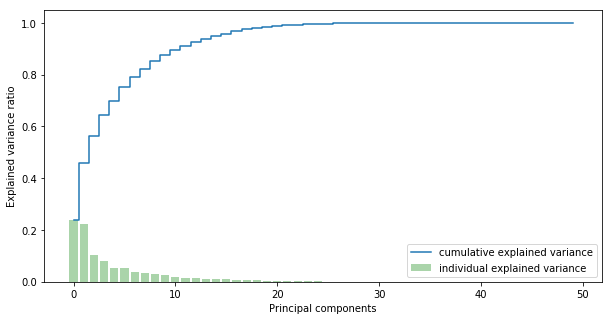

In [47]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(pre90s_cum_var_exp)), pre90s_cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

Repeat the same steps for the other dataset.

In [52]:
pca.fit(_90s_z)
_90s_existing_nd = pca.transform(_90s_z)
_90s_existing_df_nd = pd.DataFrame(_90s_existing_nd)
_90s_existing_df_nd.index = _90s.index
_90s_existing_df_nd.columns = _90s.columns
_90s_existing_df_nd.head()

,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,Age,...,USG%,Unnamed: 0,Unnamed: 0.1,VORP,WS,WS/48,Year,eFG%,height,weight
3073,2.382587,-3.052286,-1.284737,2.769595,-3.136843,0.632305,-0.938722,1.654559,-1.147818,-0.685149,...,0.044810,0.036230,-0.011812,-0.016731,-0.004640,0.000401,3.840851e-16,-4.496434e-16,-9.989219e-16,-4.023305e-16
3074,-5.770482,2.148708,-0.960767,1.930645,-1.322309,-0.875108,0.709340,1.706570,-2.802300,0.119894,...,-0.006749,0.055856,-0.006732,0.014678,-0.021720,-0.008626,-2.608291e-16,-1.024365e-15,9.050121e-17,1.426790e-16
3075,0.214276,3.569404,2.283615,0.725261,-2.585863,0.091707,0.743360,0.205956,-0.474207,-0.048584,...,-0.036889,0.028862,-0.000088,0.004573,-0.002570,-0.001404,4.089391e-16,-9.702690e-16,-2.312177e-16,-2.175526e-16
3076,-3.779992,2.281729,1.115400,1.939141,-1.181174,-1.285920,0.709914,1.216177,-0.793222,-0.514267,...,0.000565,0.047511,-0.000964,0.007960,0.002443,-0.000001,6.808371e-16,-6.316330e-16,2.999871e-16,2.868287e-16
3077,0.737157,0.917706,2.468590,1.641464,-2.623179,-1.142985,1.076432,-0.080030,0.400644,-0.468204,...,0.001596,0.037156,-0.001155,-0.002755,0.015866,0.000682,3.380335e-16,-8.556969e-16,7.313743e-16,-3.170975e-16


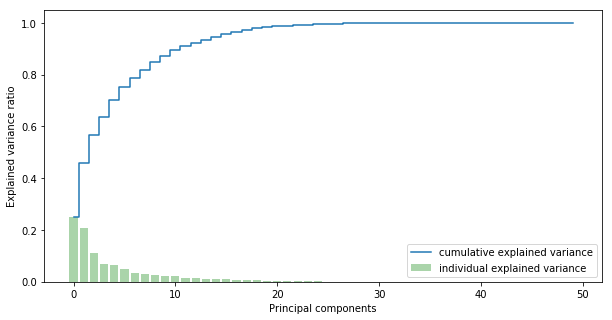

In [53]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
_90s_cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(_90s_cum_var_exp)), _90s_cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [54]:
pca.fit(_00s_z)
_00s_existing_nd = pca.transform(_00s_z)
_00s_existing_df_nd = pd.DataFrame(_00s_existing_nd)
_00s_existing_df_nd.index = _00s.index
_00s_existing_df_nd.columns = _00s.columns
_00s_existing_df_nd.head()

,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,Age,...,USG%,Unnamed: 0,Unnamed: 0.1,VORP,WS,WS/48,Year,eFG%,height,weight
6041,0.442379,0.100766,3.792544,-1.791135,-1.835205,-0.072629,0.250978,-0.908659,0.105938,-0.723968,...,0.008214,0.015948,-0.004229,-0.003031,0.004189,0.010896,-1.468213e-15,-1.454392e-15,-8.243161e-16,-2.675940e-16
6042,0.785804,0.531479,4.051421,-1.976414,-1.369907,0.554404,1.759083,-1.256335,-0.098045,-0.524827,...,0.012572,0.024672,-0.025007,0.005157,0.024969,0.009938,-1.340713e-15,-8.351949e-16,-1.354188e-15,2.853505e-16
6043,2.452434,4.349346,2.367072,-1.924083,-1.983683,-0.217633,-1.199237,1.394284,0.179858,-0.374892,...,0.006755,0.008551,-0.014551,0.005851,0.002520,0.010665,-1.026624e-15,2.468149e-16,4.849634e-16,-6.490302e-16
6044,-2.748409,5.659350,0.556353,-0.712001,-3.041027,0.999692,-0.500883,0.567746,-0.249016,-1.143478,...,0.016595,0.006719,0.030466,-0.005906,0.003560,0.012778,-2.074091e-15,-1.107924e-15,-7.377665e-16,-4.605494e-16
6045,1.066796,0.968194,4.756532,-0.658105,-2.044862,0.240246,-1.707231,0.894674,0.314079,0.155068,...,-0.002190,-0.012688,0.014914,0.002930,0.002898,0.013333,-1.121638e-16,-4.654910e-16,-8.151493e-16,-5.101557e-16


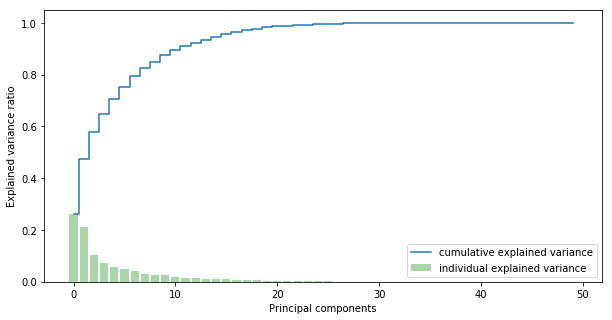

In [55]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
_00s_cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(_00s_cum_var_exp)), _00s_cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [49]:
pca.fit(_10s_z)
_10s_existing_nd = pca.transform(_10s_z)
_10s_existing_df_nd = pd.DataFrame(_10s_existing_nd)
_10s_existing_df_nd.index = _10s.index
_10s_existing_df_nd.columns = _10s.columns
_10s_existing_df_nd.head()

,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,Age,...,USG%,Unnamed: 0,Unnamed: 0.1,VORP,WS,WS/48,Year,eFG%,height,weight
9290,-1.963759,-0.567111,-2.980483,-0.219460,-3.782841,-0.981043,-0.979944,-0.397384,-0.116641,1.333807,...,0.022669,-0.017766,0.003280,-0.006290,0.004429,-0.001629,-7.700690e-17,-2.359094e-16,5.402976e-16,2.751681e-16
9291,3.308441,2.273132,0.994560,-0.964902,-3.442584,-2.503805,-0.016795,-1.116039,-0.311484,-0.721250,...,0.005666,0.010483,-0.004479,-0.007811,-0.008144,0.001435,-1.470667e-15,2.475252e-16,9.448038e-16,-1.046386e-16
9292,-1.345550,-7.256748,3.965578,-0.604146,-2.558680,0.497205,0.786017,-0.006759,1.067230,-1.362387,...,0.152412,-0.004263,-0.010989,-0.005449,0.005720,-0.004163,-8.953757e-16,6.354704e-16,-1.076233e-15,2.112576e-16
9293,-1.340843,3.024303,-2.507948,-0.392475,-3.885308,-0.570061,-0.669202,0.189357,0.826833,-0.214439,...,-0.026681,-0.008589,-0.002275,0.002447,-0.010463,-0.004463,-1.909660e-15,-2.051747e-16,-1.082921e-15,-6.323531e-17
9294,2.328623,-0.516323,1.444952,5.487141,-1.100175,1.575959,2.217838,-1.256708,-2.065718,0.078348,...,0.071923,0.005898,0.018190,-0.019041,0.005420,-0.003340,-9.851858e-16,1.033169e-15,1.197395e-15,-4.686292e-16


With these two simplied dataset with reduced dimension of 6, we can explore the different choices of number for clustering. I will keep the options open from 2 to 20.

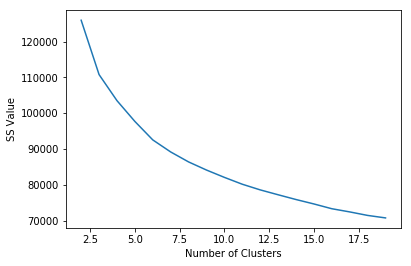

In [56]:
from sklearn.cluster import KMeans

SS = []

for i in range(2,20):
    km = KMeans(n_clusters = i)
    km.fit(pre90s_existing_df_nd)
    SS.append(km.inertia_)
    
plt.plot(range(2,20), SS)
plt.xlabel('Number of Clusters')
plt.ylabel('SS Value')
plt.show()

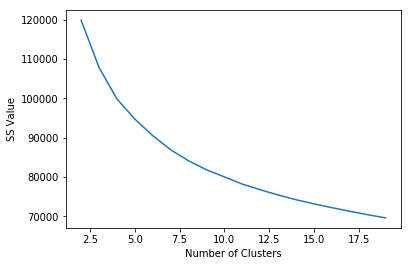

In [58]:
from sklearn.cluster import KMeans

SS = []

for i in range(2,20):
    km = KMeans(n_clusters = i)
    km.fit(_90s_existing_df_nd)
    SS.append(km.inertia_)
    
plt.plot(range(2,20), SS)
plt.xlabel('Number of Clusters')
plt.ylabel('SS Value')
plt.show()

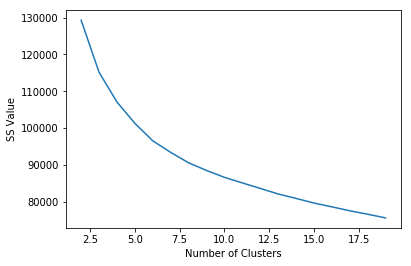

In [59]:
from sklearn.cluster import KMeans

SS = []

for i in range(2,20):
    km = KMeans(n_clusters = i)
    km.fit(_00s_existing_df_nd)
    SS.append(km.inertia_)
    
plt.plot(range(2,20), SS)
plt.xlabel('Number of Clusters')
plt.ylabel('SS Value')
plt.show()

By using the albew method, we can tell starting from 7, the SS value kind of stop decreasing as rapidly as before, so I will choose 7 as the number of clusters.

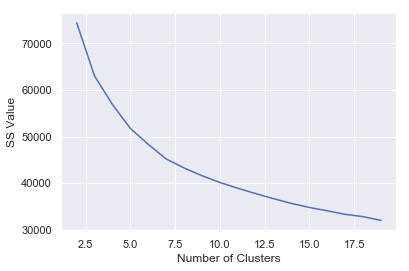

In [1692]:
SS = []

for i in range(2,20):
    km = KMeans(n_clusters = i)
    km.fit(_10s_existing_df_nd)
    SS.append(km.inertia_)
    
plt.plot(range(2,20), SS)
plt.xlabel('Number of Clusters')
plt.ylabel('SS Value')
plt.show()

For the 10s dataset, we can tell more clearly that starting from 7, the SS value stop decreasing so rapidly, so I will also choose 7 as the number of clusters.

In [61]:
import scipy
from scipy.cluster.vq import vq, kmeans, whiten
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

#changing x_z from dataframe to an array
pre90s_z1 = np.array(pre90s_existing_df_6d)

##kmeans clustering for 7 clusters
pre90s_kmeans_x,_ = kmeans(pre90s_z1,7)
#print(pre90s_kmeans_x)

In [66]:
_90s_z1 = np.array(_90s_existing_df_nd)
_90s_kmeans_x,_ = kmeans(_90s_z1,7)
_00s_z1 = np.array(_00s_existing_df_nd)
_00s_kmeans_x,_ = kmeans(_00s_z1,7)
_10s_z1 = np.array(_10s_existing_df_nd)
_10s_kmeans_x,_ = kmeans(_10s_z1,7)
#print(_10s_kmeans_x)

To see, if the PCA algorithm will be able to separate the clusters, I am adding clusters from (k =7) to the original dataframe. Then I will plot the scatterplot of PC1 vs PC2, which are the two most prominent ones to see if the seven clusters separate as they should.

In [67]:
pre90s_idx7,_ = vq(pre90s_z1,pre90s_kmeans_x)

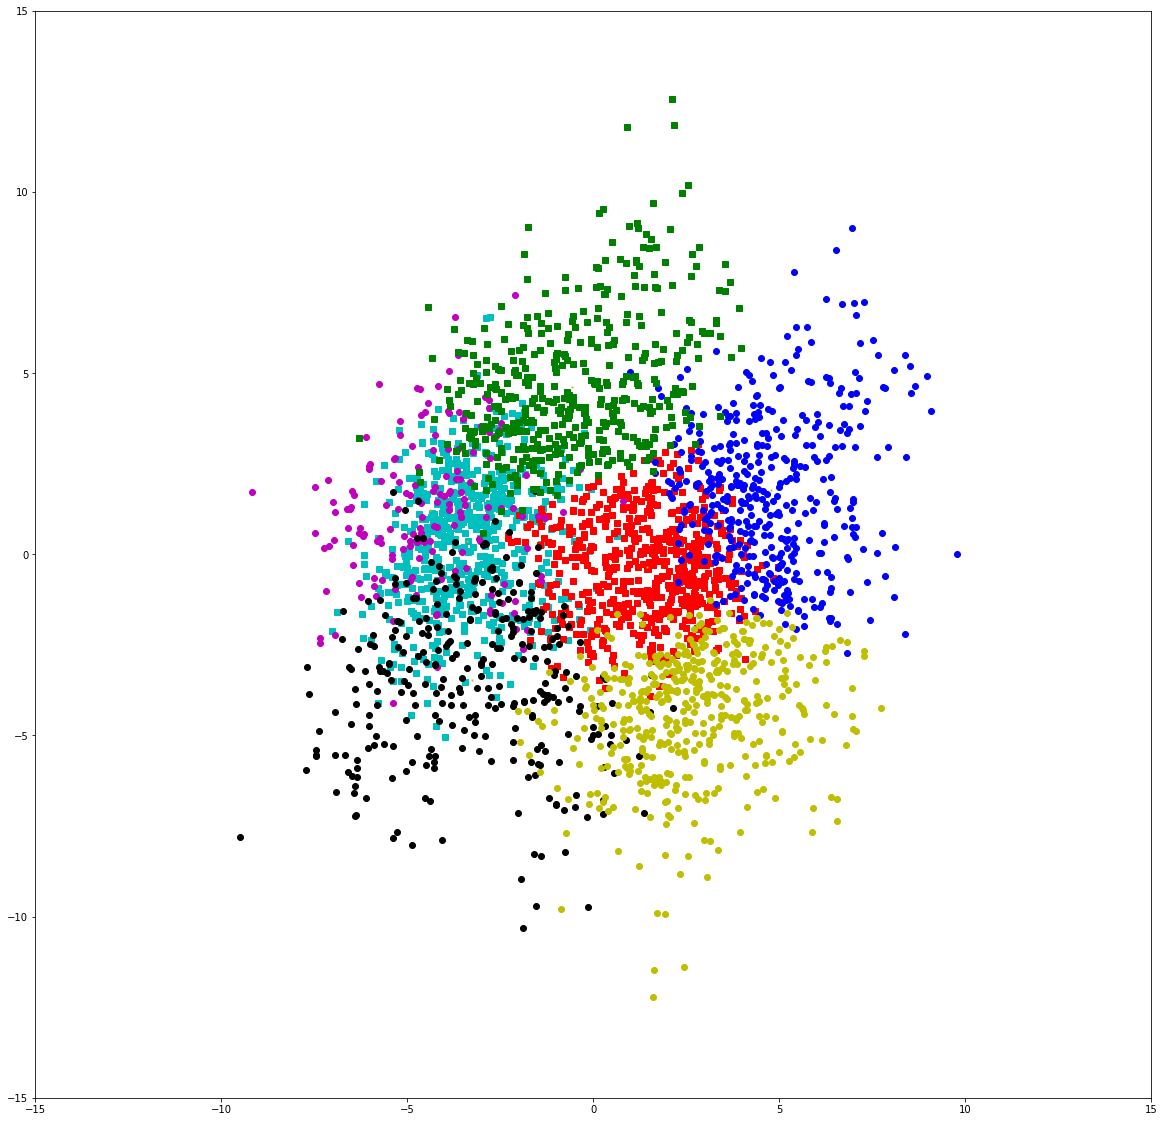

In [68]:
plt.figure(figsize=(20,20))
plt.plot(pre90s_z1[pre90s_idx7==0,0],pre90s_z1[pre90s_idx7==0,1],'sc',
     pre90s_z1[pre90s_idx7==1,0],pre90s_z1[pre90s_idx7==1,1],'sr',
     pre90s_z1[pre90s_idx7==2,0],pre90s_z1[pre90s_idx7==2,1],'om',
     pre90s_z1[pre90s_idx7==3,0],pre90s_z1[pre90s_idx7==3,1],'ob',
     pre90s_z1[pre90s_idx7==4,0],pre90s_z1[pre90s_idx7==4,1],'ok',
     pre90s_z1[pre90s_idx7==5,0],pre90s_z1[pre90s_idx7==5,1],'sg',
     pre90s_z1[pre90s_idx7==6,0],pre90s_z1[pre90s_idx7==6,1],'oy')
plt.plot(pre90s_kmeans_x[:,0],pre90s_kmeans_x[:,1],'sy',markersize=1)
plt.xlim(-15.0, 15.0)
plt.ylim(-15.0, 15.0)
show()


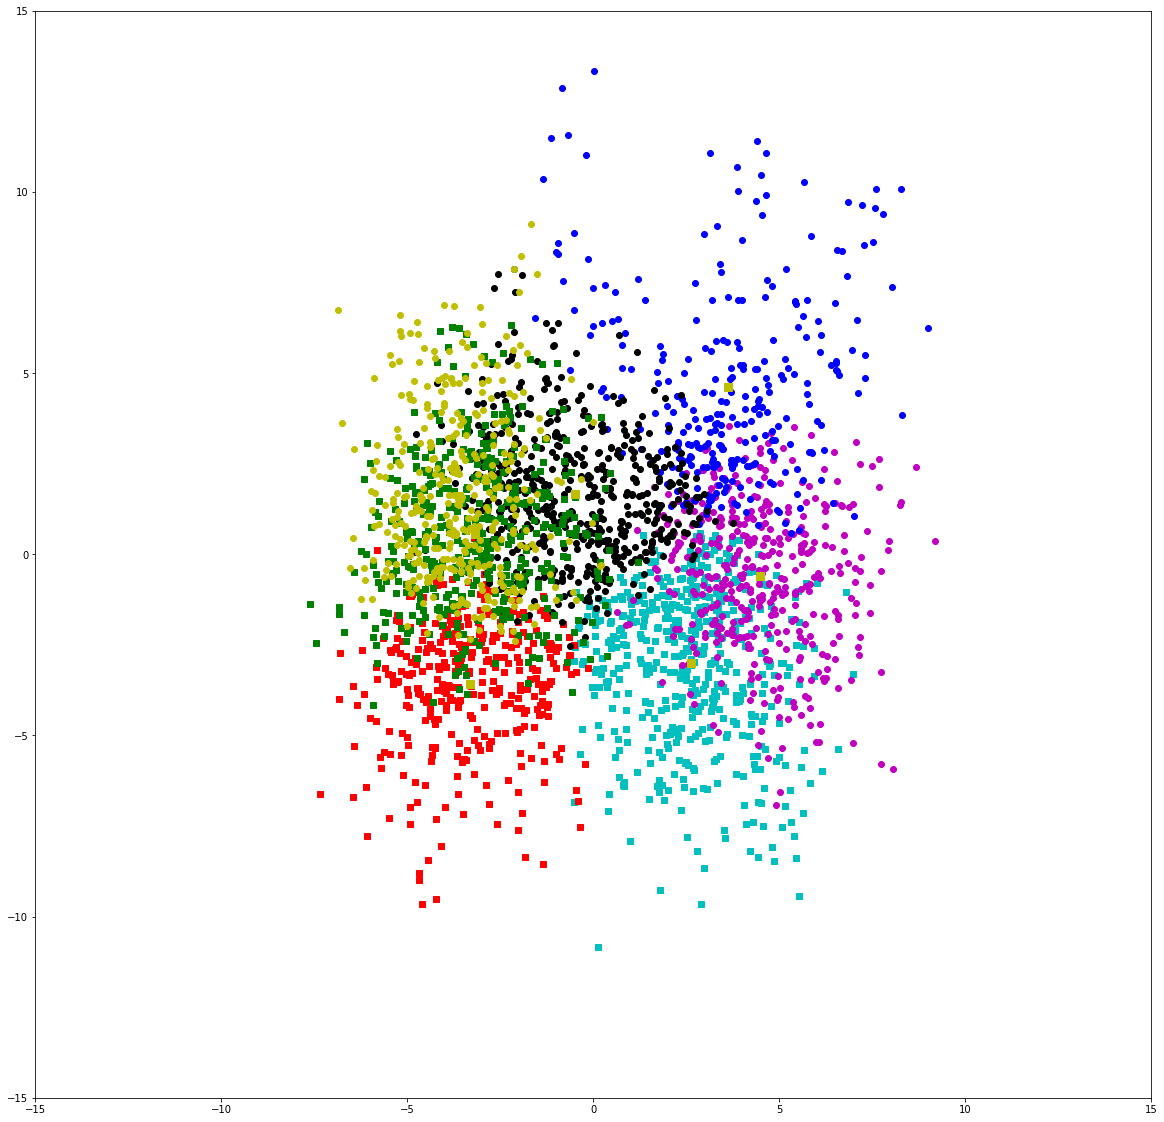

In [71]:
_90s_idx7,_ = vq(_90s_z1,_90s_kmeans_x)
plt.figure(figsize=(20,20))
plt.plot(_90s_z1[_90s_idx7==0,0],_90s_z1[_90s_idx7==0,1],'sc',
     _90s_z1[_90s_idx7==1,0],_90s_z1[_90s_idx7==1,1],'sr',
     _90s_z1[_90s_idx7==2,0],_90s_z1[_90s_idx7==2,1],'om',
     _90s_z1[_90s_idx7==3,0],_90s_z1[_90s_idx7==3,1],'ob',
     _90s_z1[_90s_idx7==4,0],_90s_z1[_90s_idx7==4,1],'ok',
     _90s_z1[_90s_idx7==5,0],_90s_z1[_90s_idx7==5,1],'sg',
     _90s_z1[_90s_idx7==6,0],_90s_z1[_90s_idx7==6,1],'oy')
plt.plot(_90s_kmeans_x[:,0],_90s_kmeans_x[:,1],'sy',markersize=8)
plt.xlim(-15.0, 15.0)
plt.ylim(-15.0, 15.0)
show()

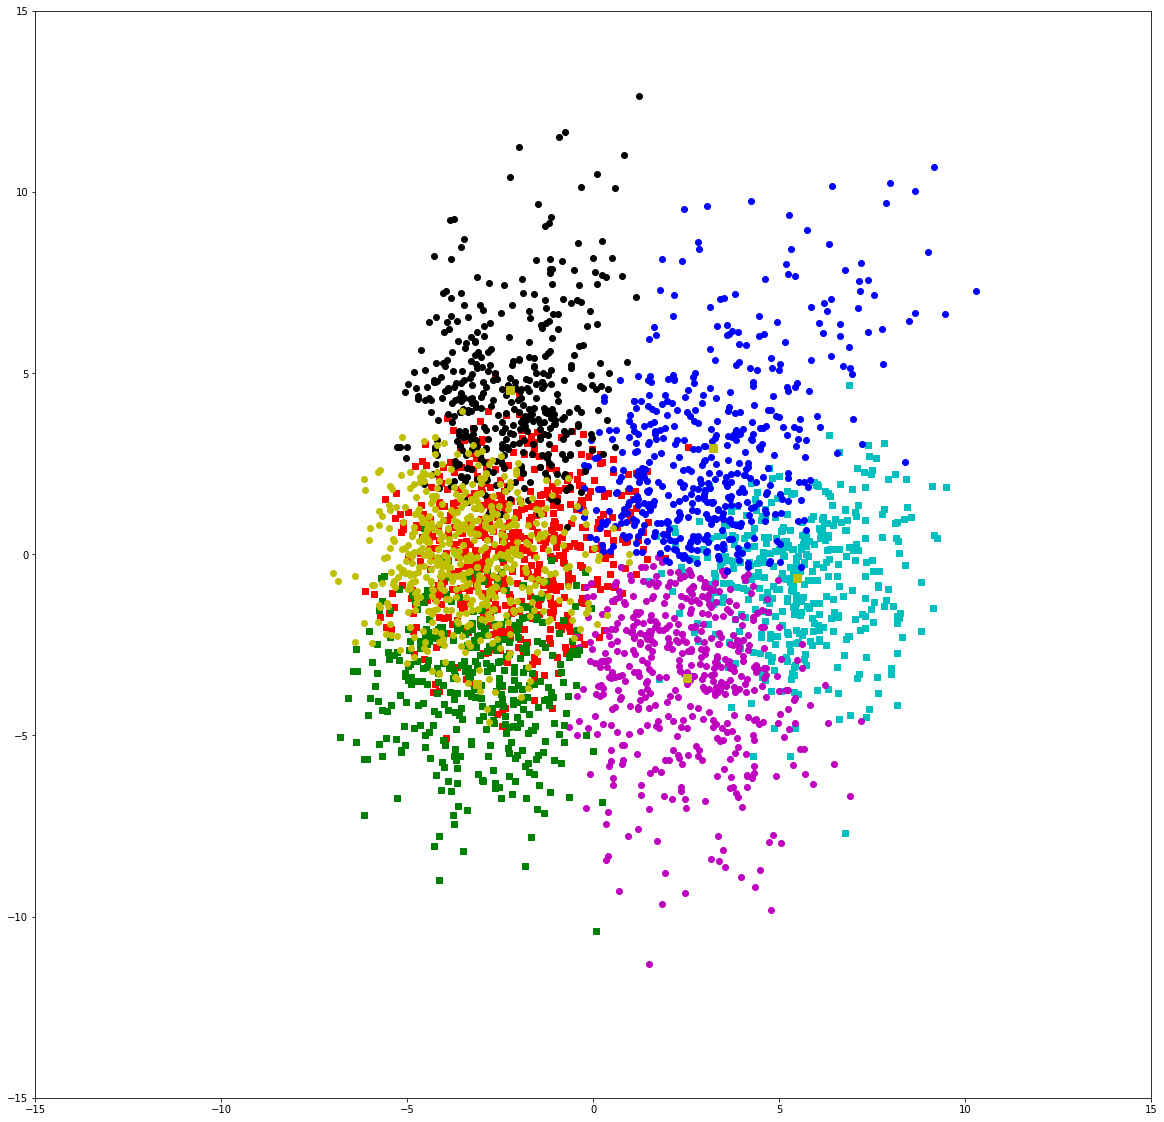

In [72]:
_00s_idx7,_ = vq(_00s_z1,_00s_kmeans_x)
plt.figure(figsize=(20,20))
plt.plot(_00s_z1[_00s_idx7==0,0],_00s_z1[_00s_idx7==0,1],'sc',
     _00s_z1[_00s_idx7==1,0],_00s_z1[_00s_idx7==1,1],'sr',
     _00s_z1[_00s_idx7==2,0],_00s_z1[_00s_idx7==2,1],'om',
     _00s_z1[_00s_idx7==3,0],_00s_z1[_00s_idx7==3,1],'ob',
     _00s_z1[_00s_idx7==4,0],_00s_z1[_00s_idx7==4,1],'ok',
     _00s_z1[_00s_idx7==5,0],_00s_z1[_00s_idx7==5,1],'sg',
     _00s_z1[_00s_idx7==6,0],_00s_z1[_00s_idx7==6,1],'oy')
plt.plot(_00s_kmeans_x[:,0],_00s_kmeans_x[:,1],'sy',markersize=8)
plt.xlim(-15.0, 15.0)
plt.ylim(-15.0, 15.0)
show()

The 7 clusters are very clear for the pre90s dataset.

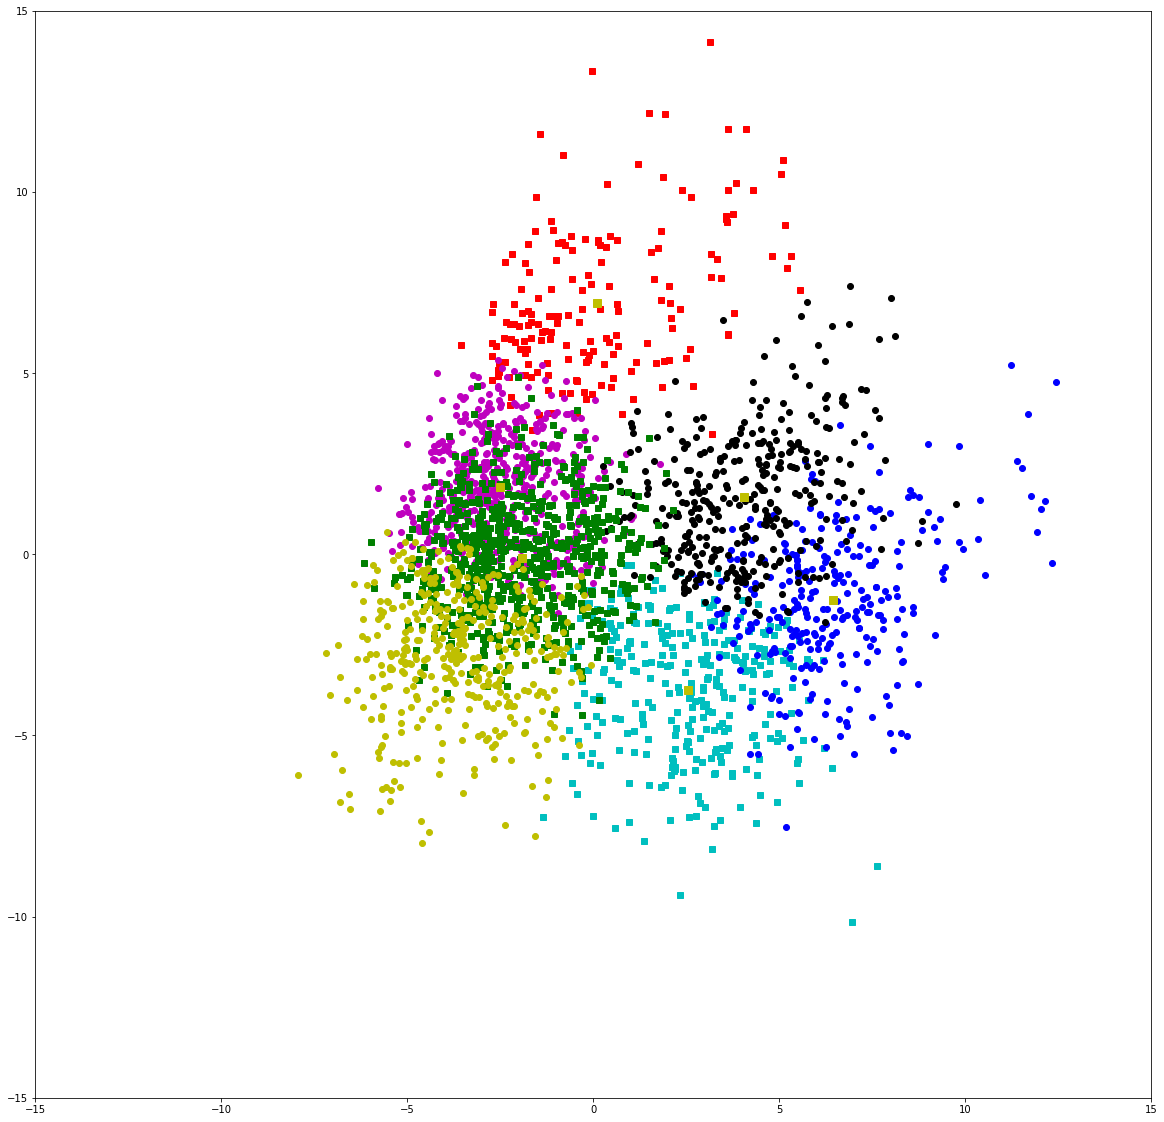

In [73]:
_10s_idx7,_ = vq(_10s_z1,_10s_kmeans_x)
plt.figure(figsize=(20,20))
plt.plot(_10s_z1[_10s_idx7==0,0],_10s_z1[_10s_idx7==0,1],'sc',
     _10s_z1[_10s_idx7==1,0],_10s_z1[_10s_idx7==1,1],'sr',
     _10s_z1[_10s_idx7==2,0],_10s_z1[_10s_idx7==2,1],'om',
     _10s_z1[_10s_idx7==3,0],_10s_z1[_10s_idx7==3,1],'ob',
     _10s_z1[_10s_idx7==4,0],_10s_z1[_10s_idx7==4,1],'ok',
     _10s_z1[_10s_idx7==5,0],_10s_z1[_10s_idx7==5,1],'sg',
     _10s_z1[_10s_idx7==6,0],_10s_z1[_10s_idx7==6,1],'oy')
plt.plot(_10s_kmeans_x[:,0],_10s_kmeans_x[:,1],'sy',markersize=8)
plt.xlim(-15.0, 15.0)
plt.ylim(-15.0, 15.0)
show()

The 7 clusters are very distinguishable for the _10s dataset.

### Intepretation of clusters

#### For pre 1990 data

In [1698]:
pre90s_cluster = pre90s_idx7
type(pre90s_cluster)

numpy.ndarray

#### Intepraate through normalized dataset

Since in normalized dataset all the attributes are scaled to the same range, and the relative difference are also scaled to the same range, which makes it easy to have visual comparison.

<Figure size 432x288 with 0 Axes>

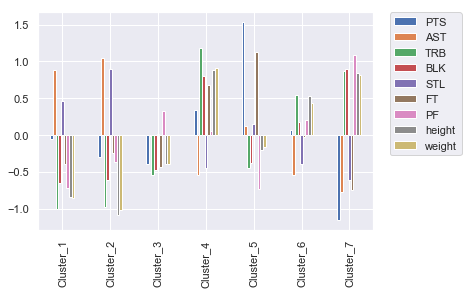

In [1699]:
##Add the cluster membership to first dataframe x
pre90s_z['cluster_ID'] = pre90s_cluster[:]
pre90s_z_cluster_sort = pre90s_z.sort_values('cluster_ID')

## Sort the players by cluster membership
cluster1 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 0]
cluster2 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 1]
cluster3 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 2]
cluster4 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 3]
cluster5 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 4]
cluster6 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 5]
cluster7 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 6]

#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])

## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']

summary_feature = summary.loc[['PTS','AST','TRB','BLK','STL','FT','PF','height','weight']]
summary_feature = summary_feature.transpose()
plt.figure()
summary_feature.plot(kind ='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) ## to move the legend outside of plot
plt.show()

#### Intepraate through unnormalized dataset

Unnormalized dataset helps to see the real facts of attributes of each cluster.

In [1700]:
pre90s_all['cluster_ID'] = pre90s_cluster[:]
pre90s_all_cluster_sort = pre90s_all.sort_values('cluster_ID')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1701]:
cluster1 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 0]
cluster2 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 1]
cluster3 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 2]
cluster4 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 3]
cluster5 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 4]
cluster6 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 5]
cluster7 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 6]

Now, lets look at the characteristics of each cluster by calculating means of each clusters.

In [1702]:
#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

In [1703]:
##Concatenate the seven dataframes along axis =1 using the index from c1means
summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])

## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']
print(summary)

                Cluster_1    Cluster_2    Cluster_3    Cluster_4    Cluster_5  \
Unnamed: 0    5571.145455  4298.174721  4775.894389  4855.263547  4730.045872   
Unnamed: 0.1  8419.818182  6568.592937  7262.455446  7374.881773  7193.337156   
Year          1986.754545  1981.776952  1983.607261  1983.923645  1983.472477   
Age             27.230303    25.996283    25.399340    26.470443    26.477064   
G               72.533333    73.384758    56.676568    76.559113    75.832569   
MP            1866.193939  1828.401487   780.709571  2256.209360  2432.717890   
PER              0.307606     0.290500     0.516540     0.296357     0.295412   
TS%              0.530645     0.512028     0.467937     0.584938     0.550913   
3PAr             0.153185     0.028745     0.035201     0.006155     0.027725   
FTr              0.248652     0.294743     0.268729     0.457978     0.324011   
ORB%             3.114848     3.405019     5.288779    10.173399     5.668807   
DRB%             7.796667   

We can also understand the character of each cluster by selecting prominent players in each cluster. Here I use minutes played(MP) as the criteria for elite players, since usually the elite players are given more opportunites to carry the game. 

In [1704]:
cluster1.loc[cluster1['MP'] >= 3100]

,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,cluster_ID
2060,5284,7974,1986,Maurice Cheeks,PG,29,PHI,82,3270.0,0.197064,...,2.587156,8.289908,2.278899,0.297248,2.620183,1.761468,13.937615,185.0,81.0,0
2646,5873,8852,1988,Mark Jackson,PG,22,NYK,82,3249.0,0.173961,...,4.387812,9.617729,2.271468,0.066482,2.858726,2.703601,12.343490,185.0,81.0,0
2984,6213,9401,1989,Terry Porter,PG,25,POR,81,3102.0,0.205416,...,4.259188,8.936170,1.694391,0.092843,2.878143,2.170213,16.607350,190.0,88.0,0
3024,6253,9461,1989,John Stockton,PG,26,UTA,82,3171.0,0.259981,...,2.815516,12.692526,2.985809,0.158940,3.496689,2.736045,15.894040,185.0,77.0,0
3018,6247,9452,1989,Kenny Smith,PG,23,SAC,81,3145.0,0.163688,...,2.586963,7.108426,1.167568,0.080127,2.850238,1.980286,16.059777,190.0,77.0,0
2867,6096,9213,1989,Dale Ellis,SG,28,SEA,82,3190.0,0.222320,...,3.859561,1.850784,1.218809,0.248276,2.460188,2.223197,25.425705,201.0,92.0,0


In [1705]:
cluster2.loc[cluster2['MP'] >= 3100]

,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,cluster_ID
665,3886,5978,1980,Norm Nixon,PG,24,LAL,82,3226.0,0.166274,...,2.555487,7.164290,1.640422,0.156231,3.213887,2.689399,16.136392,188.0,77.0,1
933,4156,6364,1981,Micheal Ray,SG,25,NYK,79,3175.0,0.193890,...,6.179528,7.109291,2.630551,0.396850,3.424252,2.925354,14.660787,198.0,85.0,1
452,3671,5669,1979,Randy Smith,SG,30,SDC,82,3111.0,0.192093,...,3.413693,4.570878,2.048216,0.057859,2.950820,2.048216,19.417551,190.0,81.0,1
412,3631,5610,1979,Norm Nixon,PG,23,LAL,82,3145.0,0.208331,...,2.644197,8.436248,2.300795,0.194595,2.644197,2.861685,16.071224,188.0,77.0,1
289,3507,5437,1979,M.L. Carr,SF,28,DET,80,3207.0,0.182975,...,6.611787,2.941066,2.211413,0.516370,2.862488,3.131899,16.804490,183.0,74.0,1


Since we also want to explore the relationship between the traditional way of clustering players which is according to the position, with our new method, I will also use bar plot to observe the distribution of player position within each cluster.

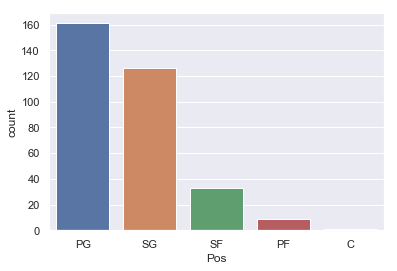

In [1706]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Pos", data=cluster1, order=["PG", "SG", "SF","PF","C"])

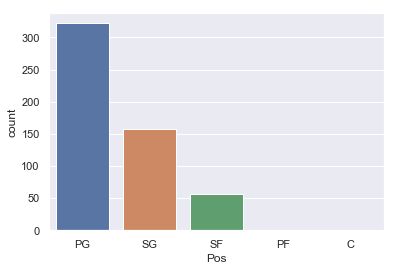

In [1707]:
ax = sns.countplot(x="Pos", data=cluster2,order=["PG", "SG", "SF","PF","C"])

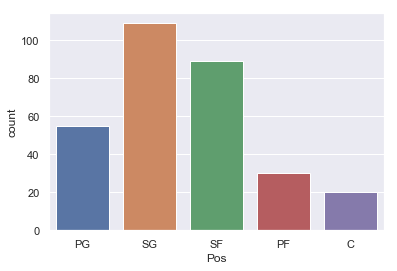

In [1708]:
ax = sns.countplot(x="Pos", data=cluster3,order=["PG", "SG", "SF","PF","C"])

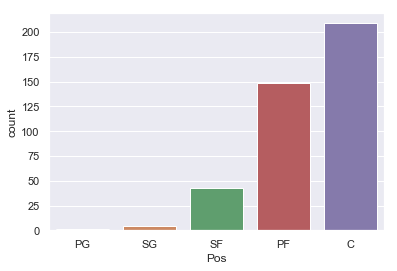

In [1709]:
ax = sns.countplot(x="Pos", data=cluster4,order=["PG", "SG", "SF","PF","C"])

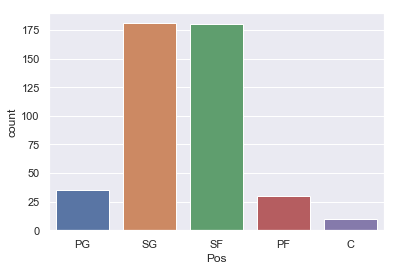

In [1710]:
ax = sns.countplot(x="Pos", data=cluster5,order=["PG", "SG", "SF","PF","C"])

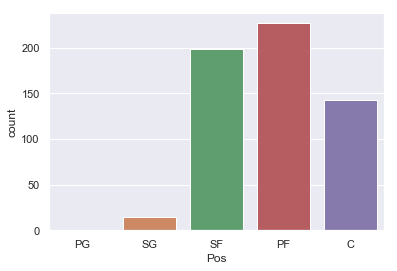

In [1711]:
ax = sns.countplot(x="Pos", data=cluster6,order=["PG", "SG", "SF","PF","C"])

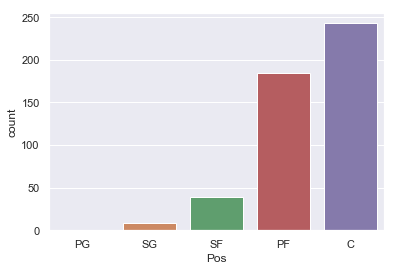

In [1712]:
ax = sns.countplot(x="Pos", data=cluster7,order=["PG", "SG", "SF","PF","C"])

#### Repeat similar approach for post 2010 data

In [76]:
_10s_cluster = _10s_idx7
_10s_all['cluster_ID'] = _10s_cluster[:]
_10s_all_cluster_sort = _10s_all.sort_values('cluster_ID')

cluster1 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 0]
cluster2 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 1]
cluster3 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 2]
cluster4 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 3]
cluster5 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 4]
cluster6 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 5]
cluster7 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 6]

#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

##Concatenate the three dataframes along axis =1 using the index from c1means
summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])

## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']
print(summary)

                 Cluster_1     Cluster_2     Cluster_3     Cluster_4  \
Unnamed: 0    13664.537217  14194.413793  13753.210216  14090.569444   
Unnamed: 0.1  21765.145631  22673.706897  21917.198428  22494.364583   
Year           2012.631068   2014.114943   2012.891945   2013.881944   
Age              26.229773     27.178161     25.978389     26.291667   
G                60.453074     70.379310     68.029470     66.322917   
MP             1083.012945   2401.241379   1911.683694   1434.052083   
PER               0.457408      0.350532      0.309168      0.496968   
TS%               0.501612      0.575115      0.525648      0.588451   
3PAr              0.052777      0.286218      0.269815      0.018111   
FTr               0.310094      0.381983      0.267544      0.447028   
ORB%              9.226537      2.966092      2.474853     11.451389   
DRB%             18.678964     13.430460     10.249509     21.813194   
TRB%             13.921036      8.277011      6.330452     16.65

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [85]:
cluster1.loc[cluster1['MP'] >= 1900]['Player'].unique()

array(['Dante Cunningham', 'Michael Kidd-Gilchrist', 'Brad Miller',
       'Bismack Biyombo', 'Luc Mbah', 'Tony Allen', 'Al-Farouq Aminu',
       'Brandon Bass', 'Samuel Dalembert', 'Jason Thompson',
       'Tyler Zeller', 'Spencer Hawes', 'Kendrick Perkins',
       'Jerami Grant', 'Taj Gibson', 'Kenyon Martin', 'Joakim Noah',
       'Nerlens Noel', 'Jonas Jerebko'], dtype=object)

In [91]:
cluster2.loc[cluster2['MP'] >= 2500]['Player'].unique()

array(['LeBron James', 'Stephen Curry', 'Gordon Hayward', 'James Harden',
       'Isaiah Thomas', 'Kevin Durant', 'Klay Thompson', 'John Wall',
       'Eric Bledsoe', 'Carmelo Anthony', 'Dirk Nowitzki', 'Kemba Walker',
       'DeMar DeRozan', 'Giannis Antetokounmpo', 'Russell Westbrook',
       'Kyrie Irving', 'Kevin Martin', 'Jimmy Butler', 'Danny Granger',
       'Kobe Bryant', 'Deron Williams', 'Draymond Green',
       'Damian Lillard', 'Kyle Lowry', 'Paul Pierce', 'Dwyane Wade',
       'Chris Paul', 'Derrick Rose', 'Marc Gasol', 'Paul George',
       'Steve Nash', 'Rudy Gay', 'C.J. McCollum', 'Tony Parker',
       'Goran Dragic', 'Jeff Teague', 'Bradley Beal', 'Kevin Love'],
      dtype=object)

In [92]:
cluster3.loc[cluster3['MP'] >= 2800]['Player'].unique()

array(['Harrison Barnes', 'Khris Middleton', 'O.J. Mayo',
       'Damian Lillard', 'Jeff Green', 'Jrue Holiday', 'Gordon Hayward',
       'Brandon Jennings', 'Kemba Walker', 'Monta Ellis', 'Evan Turner',
       'Andrew Wiggins', 'Paul George', 'Luol Deng', 'DeMar DeRozan',
       'Russell Westbrook', 'Rajon Rondo', 'Derrick Rose', 'John Salmons',
       'Mike Conley', 'Stephen Curry', 'Aaron Brooks', 'Rudy Gay',
       'Joe Johnson', 'Andre Iguodala', 'Stephen Jackson'], dtype=object)

In [96]:
cluster4.loc[cluster4['MP'] >= 2200]['Player'].unique()

array(['Rudy Gobert', 'Dwight Howard', 'DeAndre Jordan', 'Joakim Noah',
       'Robin Lopez', 'Amir Johnson', 'Emeka Okafor', 'Marcin Gortat',
       'Nene Hilario', 'Jonas Valanciunas', 'Marc Gasol',
       'Andre Drummond', 'Brendan Haywood', 'Tristan Thompson',
       'Serge Ibaka', 'Omer Asik', 'Andrew Bogut', 'Tyson Chandler',
       'Steven Adams', 'Kenneth Faried', 'Greg Monroe', 'Gorgui Dieng'],
      dtype=object)

In [100]:
cluster5.loc[cluster5['MP'] >= 2300]['Player'].unique()

array(['Anthony Davis', 'Tristan Thompson', 'Blake Griffin',
       'Andre Drummond', 'Joakim Noah', 'Serge Ibaka', 'Greg Monroe',
       'Giannis Antetokounmpo', 'Roy Hibbert', 'Paul Millsap',
       'Nikola Vucevic', 'Zach Randolph', 'Spencer Hawes', 'Al Horford',
       'Marcin Gortat', 'Josh Smith', 'Marc Gasol', 'Pau Gasol',
       'David West', 'Al Jefferson', 'Kevin Love', 'Taj Gibson',
       'LaMarcus Aldridge', 'Rudy Gay', 'Thaddeus Young', 'Luis Scola',
       "Amar'e Stoudemire", 'Jason Thompson', 'Gerald Wallace',
       'Lamar Odom', 'Troy Murphy', 'Dirk Nowitzki', 'Chris Bosh',
       'Carlos Boozer', 'Karl-Anthony Towns', 'DeMarcus Cousins',
       'Elton Brand', 'Gorgui Dieng', 'Michael Kidd-Gilchrist',
       'Luol Deng', 'Tim Duncan', 'Brook Lopez', 'Myles Turner',
       'Andrea Bargnani', 'Michael Beasley', 'Hassan Whiteside',
       'Chris Kaman', 'Jabari Parker', 'J.J. Hickson', 'David Lee',
       'Shawn Marion', 'Carl Landry', 'Antawn Jamison'], dtype=object)

In [103]:
cluster6.loc[cluster6['MP'] >= 2400]['Player'].unique()

array(['J.J. Redick', 'Klay Thompson', 'Courtney Lee', 'Otto Porter',
       'Wesley Matthews', 'Marcus Morris', 'Kentavious Caldwell-Pope',
       'P.J. Tucker', 'Rodney Hood', 'George Hill', 'Tobias Harris',
       'Joe Johnson', 'Evan Fournier', 'Kyle Korver', 'Gary Harris',
       'Draymond Green', 'Trevor Ariza', 'Avery Bradley',
       'Chandler Parsons', 'Wilson Chandler', 'Landry Fields',
       'Alonzo Gee', 'Boris Diaw', 'Luol Deng', 'Tayshaun Prince',
       'Metta World', 'Nicolas Batum', 'Marvin Williams', 'Corey Brewer',
       'Jimmy Butler', 'Jose Calderon', 'Ray Allen', 'Jason Richardson',
       'Dorell Wright', 'Jason Kidd', 'Richard Jefferson',
       'Channing Frye', 'Ryan Anderson', 'Jeff Green', 'Danilo Gallinari',
       'J.R. Smith', 'Lance Stephenson', 'Arron Afflalo', 'Grant Hill',
       'Ben McLemore', 'Rasual Butler', 'Brandon Rush', 'Shawn Marion',
       'Jodie Meeks', 'Khris Middleton', 'Mike Dunleavy', 'Randy Foye'],
      dtype=object)

In [106]:
cluster7.loc[cluster7['MP'] >= 1900]['Player'].unique()

array(['Monta Ellis', 'Brandon Ingram', 'Chris Duhon', 'Travis Outlaw',
       'Ben McLemore', 'Tayshaun Prince', 'Joe Johnson', 'Norris Cole',
       'Luc Mbah', 'Dion Waiters', 'Matthew Dellavedova',
       'Emmanuel Mudiay'], dtype=object)

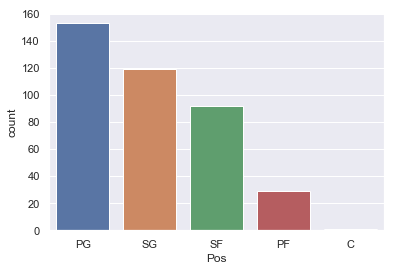

In [1721]:
ax = sns.countplot(x="Pos", data=cluster1, order=["PG", "SG", "SF","PF","C"])

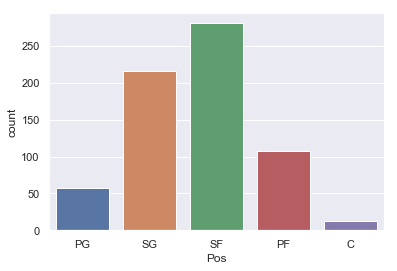

In [1722]:
ax = sns.countplot(x="Pos", data=cluster2, order=["PG", "SG", "SF","PF","C"])

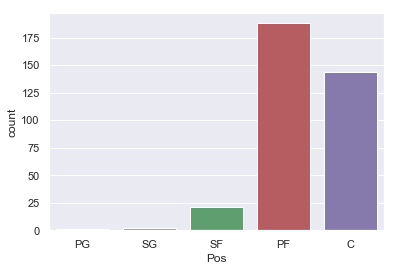

In [1723]:
ax = sns.countplot(x="Pos", data=cluster3, order=["PG", "SG", "SF","PF","C"])

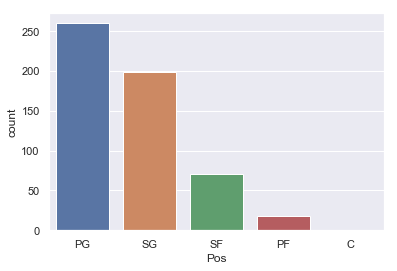

In [1724]:
ax = sns.countplot(x="Pos", data=cluster4, order=["PG", "SG", "SF","PF","C"])

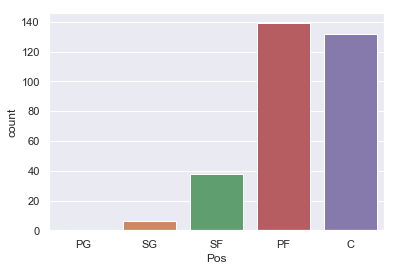

In [1725]:
ax = sns.countplot(x="Pos", data=cluster5, order=["PG", "SG", "SF","PF","C"])

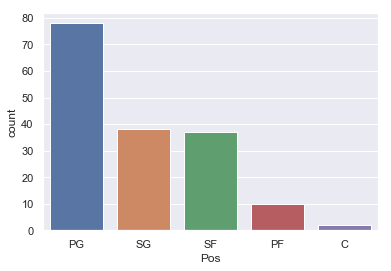

In [1726]:
ax = sns.countplot(x="Pos", data=cluster6, order=["PG", "SG", "SF","PF","C"])

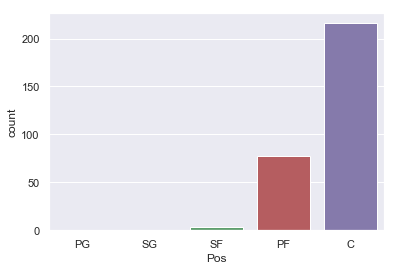

In [1727]:
ax = sns.countplot(x="Pos", data=cluster7, order=["PG", "SG", "SF","PF","C"])

In [1728]:
_10s_z['cluster_ID'] = _10s_cluster[:]
_10s_z_cluster_sort = _10s_z.sort_values('cluster_ID')

In [1729]:
cluster1 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 0]
cluster2 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 1]
cluster3 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 2]
cluster4 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 3]
cluster5 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 4]
cluster6 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 5]
cluster7 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 6]

In [1730]:
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

<Figure size 432x288 with 0 Axes>

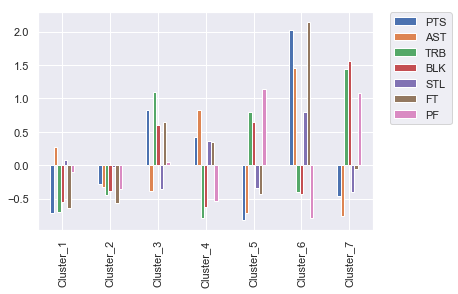

In [1731]:
summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])

## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']

summary_feature = summary.loc[['PTS','AST','TRB','BLK','STL','FT','PF']]
summary_feature = summary_feature.transpose()
plt.figure()
summary_feature.plot(kind ='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) ## to move the legend outside of plot
plt.show()